In [1]:
import os
import rasterio
from rasterio.plot import reshape_as_image
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore') #to allow the division by zero

# Functions

In [2]:
#function (1) calculate the DVNI
def calculate_ndvi(red,nir):
    ndvi = (nir.astype(float) - red.astype(float)) / (nir.astype(float) + red.astype(float))
    return ndvi

# Calculate the NDVI index in a small area

The NDVI (Normalized Difference Vegetation Index) is an index commonly used in agriculture or land- classification project. The index quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).
For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have an NDVI value close to +1, there’s a high possibility that it’s dense green leaves. But when NDVI is close to zero, there are likely no green leaves, and it could even be an urbanized area.
NDVI always ranges from -1 to +1, it is calculated with the the NIR and red channels from a camera.

## Load Data

In [3]:
#get the current working directory
cwd = os.getcwd()

In [4]:
#complete the path file to address the 10R folder.
path_dir = "/S2B_MSIL2A_20230301T104859_N0509_R051_T31TCF_20230301T135211.SAFE/\
GRANULE/L2A_T31TCF_A031251_20230301T105247/IMG_DATA/R10m"

images_10m = os.listdir(cwd + path_dir) 

In [5]:
#list with the names of the files
images_10m

['T31TCF_20230301T104859_B08_10m.jp2',
 'T31TCF_20230301T104859_B03_10m.jp2',
 'T31TCF_20230301T104859_B02_10m.jp2',
 'T31TCF_20230301T104859_WVP_10m.jp2',
 'T31TCF_20230301T104859_TCI_10m.jp2',
 'T31TCF_20230301T104859_B04_10m.jp2',
 'T31TCF_20230301T104859_AOT_10m.jp2']

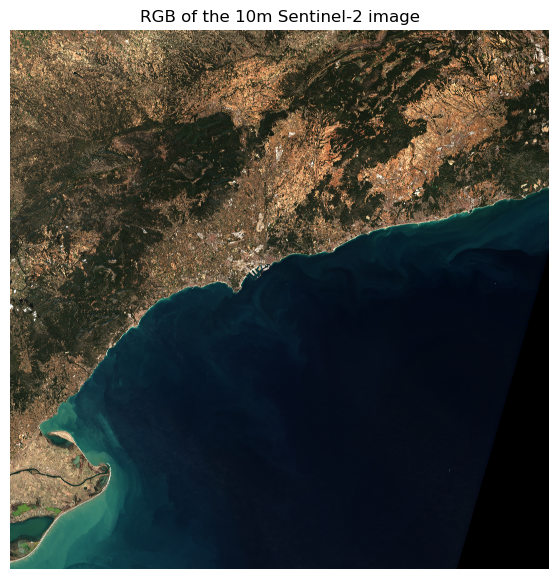

In [6]:
#read the RGB image from sentinel-2
img_data = rasterio.open(cwd + path_dir +'/T31TCF_20230301T104859_TCI_10m.jp2').read()

#reshape the array as image in order to plot it
img = reshape_as_image(img_data) 


plt.figure(figsize=(10,7))
plt.imshow(img)
plt.title("RGB of the 10m Sentinel-2 image")
plt.axis('off')
plt.show()

The image is from the provice of Tarragona where it can see the dry climate and rocky mountains.

## Get Red and NIR bands

In [16]:
#get the Red and NIR band images
red_image =  [b for b in images_10m if "B04" in b]
nir_image =  [b for b in images_10m if "B08" in b]

In [17]:
#read the red and NIR bands
red = rasterio.open(cwd + path_dir + "/" + red_image[0]).read(1)
nir = rasterio.open(cwd + path_dir + "/" + nir_image[0]).read(1)

## Calculate the NDVI

In [18]:
#use function (1) to get the NDVI
ndvi_10m = calculate_ndvi(red,nir)

## Plot the NDVI

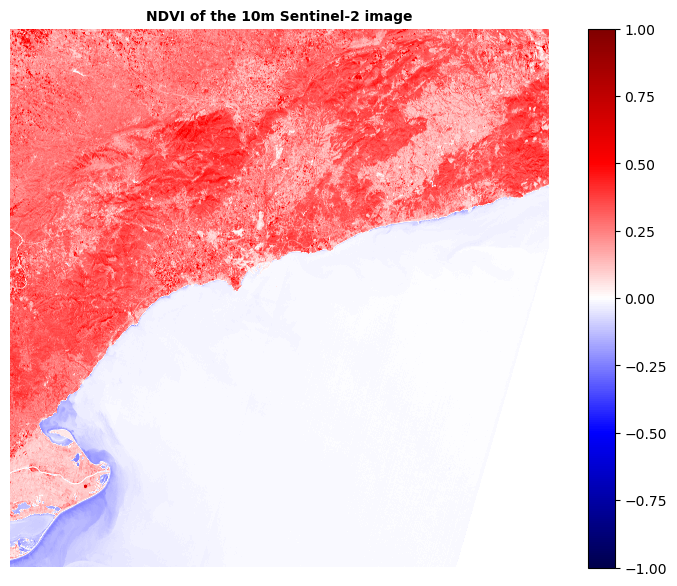

In [19]:
plt.figure(figsize=(10,7))
plt.imshow(ndvi_10m,cmap='seismic', vmin=-1, vmax=1)
plt.title("NDVI of the 10m Sentinel-2 image",fontsize=10,weight='bold')
plt.colorbar()
plt.axis('off')
plt.show()

The graph shows the sea, water bodies and urban areas in white, the coastline in blue and vegetation in red.  The Ebro delta shows a low NDVI because it is a heavily agricultural area that may affect it.

# Reduce the number of colors of any jpg image

Given a jpg image, could you average the colors so you end up with a new image with less colors?

In [11]:
#read a image
original_img = plt.imread('531314-landscape-4k.jpg')

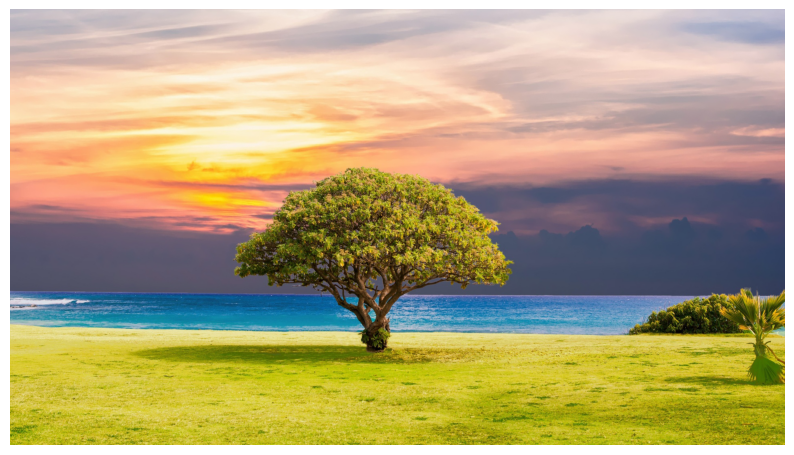

In [12]:
#plot the original image

plt.figure(figsize=(10,7))
plt.imshow(original_img)
plt.axis('off')
plt.show()

In [13]:
# color quantization
n_segments = 64 #number of segments
reduced_img = (original_img // n_segments * n_segments) + (n_segments// 2)

- The above formula divides the colour of each pixel in the original image by the number of segments evenly, multiplying the result by the number of segments to assign the colour of each pixel.

- The second term adds half of the segment to the centre of each coloured segment to obtain the colour of the reduced pixel trying to ensure that the colour corresponds to the upper boundary. 

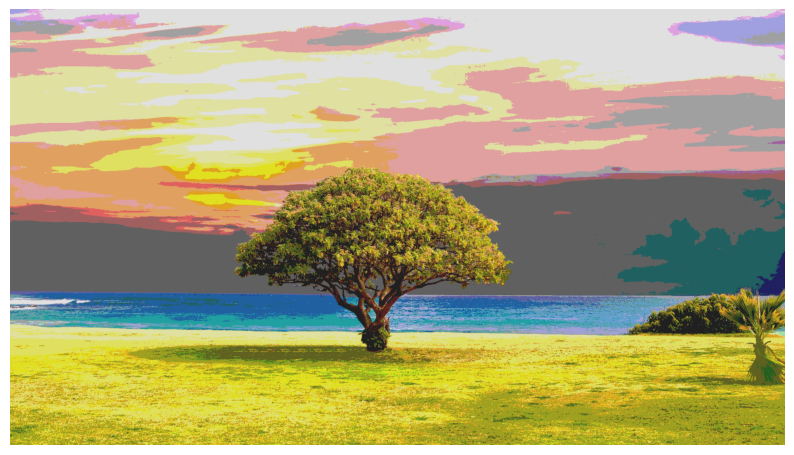

In [14]:
plt.figure(figsize=(10,7))
plt.imshow(reduced_img)
plt.axis('off')
plt.show()

- Since it is a uniform proposal, the higher the number of segments the image will lose colour.

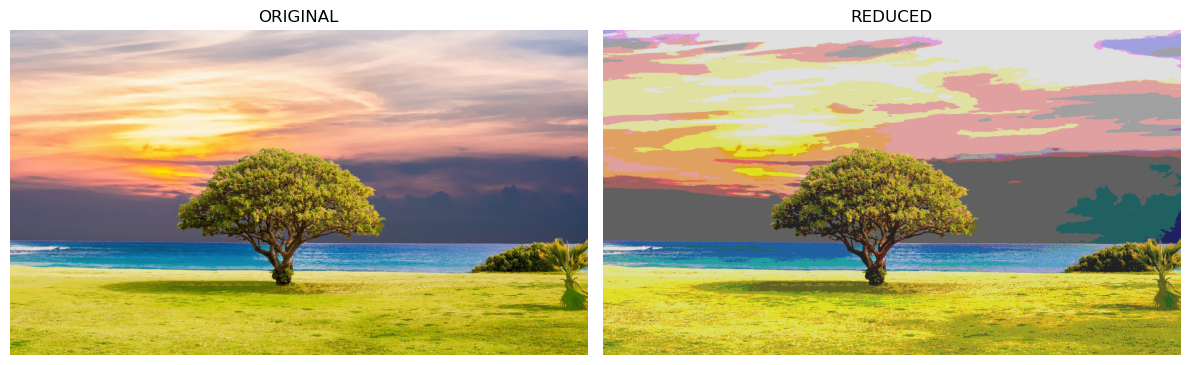

In [15]:
titles = ["ORIGINAL","REDUCED"]
images = [original_img,reduced_img]
fig,axes = plt.subplots(1,2,figsize=(12, 8))
for i in range(0,2):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(titles[i])
    plt.tight_layout()
plt.show()

In the image comparison it is possible to see the reduction of colours, looking for the colours closest to each pixel. It can be noticed in the sky that the yellow areas are brighter and in some parts tend to be white.